# Pyam Integration

*Note: This notebook will eventually show how OpenSCM integrates with Pyam. For now it's just a very basic sketch of how the integration will work.

*Note:* These notebooks will be re-written as part of our [first milestone](https://github.com/openclimatedata/openscm/milestone/1)

Here we make use of the ``scenarios`` module of OpenSCM. However, keep in mind the [direct connection to the IIASA database made available in Pyam](https://pyam-iamc.readthedocs.io/en/latest/tutorials/iiasa_dbs.html) for more in-depth analysis with up-to-date scenarios.

In [1]:
# NBVAL_IGNORE_OUTPUT
import datetime as dt

import numpy as np
import pyam
import seaborn as sns
from pyam import IamDataFrame

from openscm.scenarios import rcps
from openscm.units import _unit_registry
from openscm.utils import convert_datetime_to_openscm_time

from utils_tmp import run

<IPython.core.display.Javascript object>

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
Not importing directory /home/zebedee/Documents/AGCEC/MCastle/openscm-znfork/venv/lib/python3.7/site-packages/sphinxcontrib: missing __init__
Not importing directory /home/zebedee/Documents/AGCEC/MCastle/openscm-znfork/venv/lib/python3.7/site-packages/mpl_toolkits: missing __init__


In [2]:
color_map = {
    'RCP26': 'AR5-RCP-2.6',
    'RCP45': 'AR5-RCP-4.5',
    'RCP60': 'AR5-RCP-6.0',
    'RCP85': 'AR5-RCP-8.5',
}
pyam.run_control().update({'color': {'scenario': color_map}})

sns.set(style="darkgrid")

Here we use the RCPs. Just for illustration, we firstly convert them back to `pyam.IamDataFrame`, then show how OpenSCM works with IamDataFrames from this point onwards.

*Note:* we have to filter the data first as IamDataFrames do not work with data outside of Panda's datetime bounds (see [here](https://stackoverflow.com/a/37226672)). 

In [3]:
df = IamDataFrame(rcps.filter(year=range(1, 2201)).timeseries())
type(df)

pyam.core.IamDataFrame

In [4]:
# NBVAL_IGNORE_OUTPUT
df["variable"].unique()

array(['Emissions|BC', 'Emissions|C2F6', 'Emissions|C6F14',
       'Emissions|CCl4', 'Emissions|CF4', 'Emissions|CFC11',
       'Emissions|CFC113', 'Emissions|CFC114', 'Emissions|CFC115',
       'Emissions|CFC12', 'Emissions|CH3Br', 'Emissions|CH3CCl3',
       'Emissions|CH3Cl', 'Emissions|CH4', 'Emissions|CO',
       'Emissions|CO2|MAGICC AFOLU',
       'Emissions|CO2|MAGICC Fossil and Industrial', 'Emissions|HCFC141b',
       'Emissions|HCFC142b', 'Emissions|HCFC22', 'Emissions|HFC125',
       'Emissions|HFC134a', 'Emissions|HFC143a', 'Emissions|HFC227ea',
       'Emissions|HFC23', 'Emissions|HFC245fa', 'Emissions|HFC32',
       'Emissions|HFC4310', 'Emissions|Halon1202', 'Emissions|Halon1211',
       'Emissions|Halon1301', 'Emissions|Halon2402', 'Emissions|N2O',
       'Emissions|NH3', 'Emissions|NMVOC', 'Emissions|NOx',
       'Emissions|OC', 'Emissions|SF6', 'Emissions|SOx'], dtype=object)

In [5]:
df["region"].unique()

array(['World'], dtype=object)

In [6]:
df["scenario"].unique()

array(['RCP60', 'RCP26', 'RCP85', 'RCP45'], dtype=object)

*Note:* For an explanation of the `parameter_type` column, see the 'timeseries-conversion' notebook.

In [7]:
# NBVAL_IGNORE_OUTPUT
df.timeseries().head()

1765-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.000000   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010763   

                                                                    1766-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.106998   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010752   

                                                                    1767-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.133383   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010748   

                                                                    1768-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.159847   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010744   

                                                                    1769-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.186393   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010740   

                                                                    1770-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.213024   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010736   

                                                                    1771-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.239742   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010731   

                                           

Pyam's plotting functions provide great defaults for making all sorts of informative plots.

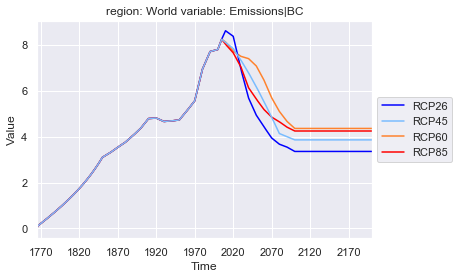

In [8]:
df.filter(variable='Emissions|BC').line_plot(
    x="time",
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
);

The use of a `pd.DataFrame` underneath the hood makes integration with other tools, like seaborn, trivial (of course you have to define your colour schemes more carefully if you don't plot via Pyam).

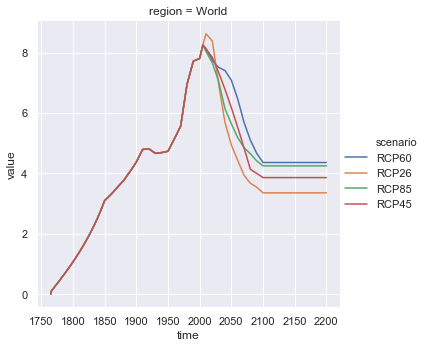

In [9]:
emissions_bc = df.filter(
    variable="Emissions|BC"
).data
sns.relplot(
    x="time",
    y="value",
    kind="line",
    col="region",
    hue="scenario",
    data=emissions_bc,
    ci=None,
    facet_kws={"sharey": False},
);

## Running scenarios

To run scenarios, we have to define two things:

1. the scenarios we want to run (here in the form of an `ScmDataFrame`)
1. the climate models and configuration we want to run (here as a `dict` or climate_model-parameter_dict key-value pairs but there is probably a smarter format)

In [10]:
scenarios = rcps

start_time = convert_datetime_to_openscm_time(dt.datetime(1950, 1, 1))
stop_time = convert_datetime_to_openscm_time(dt.datetime(2050, 1, 1))
climate_model_configs = {
    "PH99": [
        {
            ("ecs",): 3.0 * _unit_registry("delta_degC"),
            ("start_time",): start_time * _unit_registry("s"),  # could take this from scenario information if not set?
            ("stop_time",): stop_time * _unit_registry("s"),
        }, 
        {
            ("ecs",): 3.0 * _unit_registry("delta_degC"),
            ("start_time",): start_time * _unit_registry("s"),  # could take this from scenario information if not set?
            ("stop_time",): stop_time * _unit_registry("s"),
            ("PH99", "sigma"): 3.0 * _unit_registry("1/yr"),
        }, 
        {
            ("ecs",): 2.5 * _unit_registry("delta_degC"), 
            ("start_time",): start_time * _unit_registry("s"),  # could take this from scenario information if not set?
            ("stop_time",): stop_time * _unit_registry("s"),
            ("PH99", "sigma"): 4 * _unit_registry("1/yr"),
        }, 
        {
            ("ecs",): 2.0 * _unit_registry("delta_degC"), 
            ("start_time",): start_time * _unit_registry("s"),  # could take this from scenario information if not set?
            ("stop_time",): stop_time * _unit_registry("s"),
            ("PH99", "sigma"): 3.5 * _unit_registry("1/yr"),
        }
    ]
}

Having defined these two things, running is trivial.

In [11]:
results = run(scenarios, climate_model_configs)

AIM
RCP60


Not using stop_time
Updating ecs also updates alpha
Converting input World from string to tuple


IMAGE
RCP26
MESSAGE
RCP85
MiniCAM
RCP45


## Analysing the output

`ScmDataFrame` is ideally suited to then analyse the output (with its plotting features coming thanks to its easy conversion to `IamDataFrame`).

In [12]:
results.head()

,,,,,,,,,time,1950-01-01 00:00:00,1951-01-01 00:00:00,1952-01-01 00:00:00,1953-01-01 00:00:00,1954-01-01 00:00:00,1955-01-01 00:00:00,1956-01-01 00:00:00,1957-01-01 00:00:00,1958-01-01 00:00:00,1959-01-01 00:00:00,...,2040-01-01 00:00:00,2041-01-01 00:00:00,2042-01-01 00:00:00,2043-01-01 00:00:00,2044-01-01 00:00:00,2045-01-01 00:00:00,2046-01-01 00:00:00,2047-01-01 00:00:00,2048-01-01 00:00:00,2049-01-01 00:00:00
model,scenario,region,variable,unit,PH99|sigma (1 / a),climate_model,ecs (delta_degC),start_time (second),stop_time (second),,,,,,,,,,,,,,,,,,,,,
AIM,RCP60,World,Atmospheric Concentrations|CO2,ppm,3.5,PH99,2.0,-631152000,2524608000,290.0,291.184763,292.504749,293.827376,295.141132,296.464764,297.866445,299.33536,300.829906,302.348277,...,469.780324,471.999916,474.263833,476.577435,478.939915,481.357108,483.814906,486.319271,488.869467,491.471889
IMAGE,RCP26,World,Atmospheric Concentrations|CO2,ppm,3.5,PH99,2.0,-631152000,2524608000,290.0,291.184763,292.504749,293.827376,295.141132,296.464764,297.866445,299.33536,300.829906,302.348277,...,456.190096,455.920142,455.587481,455.192403,454.736003,454.217879,453.642072,453.008085,452.316921,451.567469
MESSAGE,RCP85,World,Atmospheric Concentrations|CO2,ppm,3.5,PH99,2.0,-631152000,2524608000,290.0,291.184763,292.504749,293.827376,295.141132,296.464764,297.866445,299.33536,300.829906,302.348277,...,515.175750,519.697278,524.292935,528.973942,533.738970,538.600008,543.528998,548.538197,553.626386,558.806520
MiniCAM,RCP45,World,Atmospheric Concentrations|CO2,ppm,3.5,PH99,2.0,-631152000,2524608000,290.0,291.184763,292.504749,293.827376,295.141132,296.464764,297.866445,299.33536,300.829906,302.348277,...,481.268921,483.614264,485.908304,488.158352,490.365313,492.535909,494.659262,496.742134,498.785357,500.795148
AIM,RCP60,World,Atmospheric Concentrations|CO2,ppm,4.0,PH99,2.5,-631152000,2524608000,290.0,291.184763,292.504749,293.827376,295.141132,296.464764,297.866445,299.33536,300.829906,302.348277,...,469.780324,471.999916,474.263833,476.577435,478.939915,481.357108,483.814906,486.319271,488.869467,491.471889


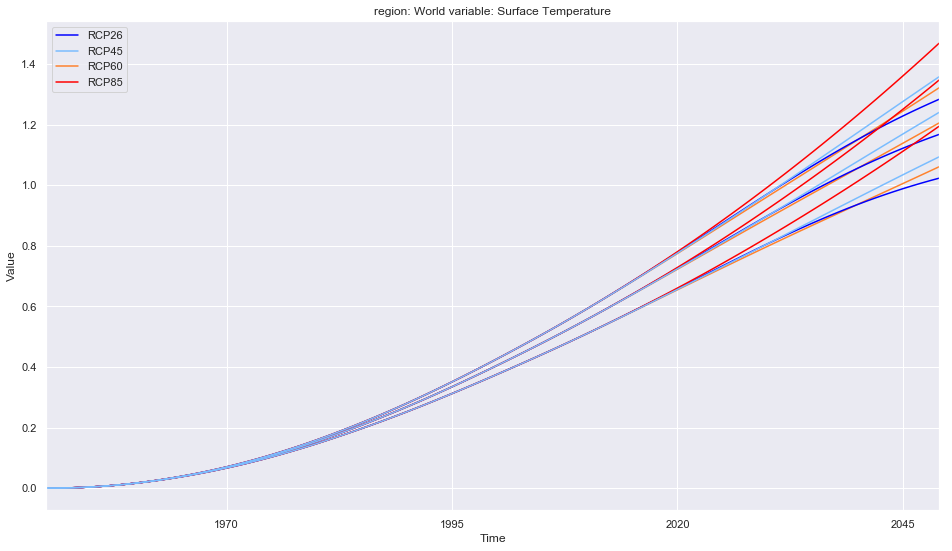

In [13]:
# IamDataFrame doesn't work with nan in metadata so runs with nan for PH99|sigma are dropped...
results.filter(
    variable="Surface Temperature"
).line_plot(
    color="scenario",
    figsize=(16, 9)
);

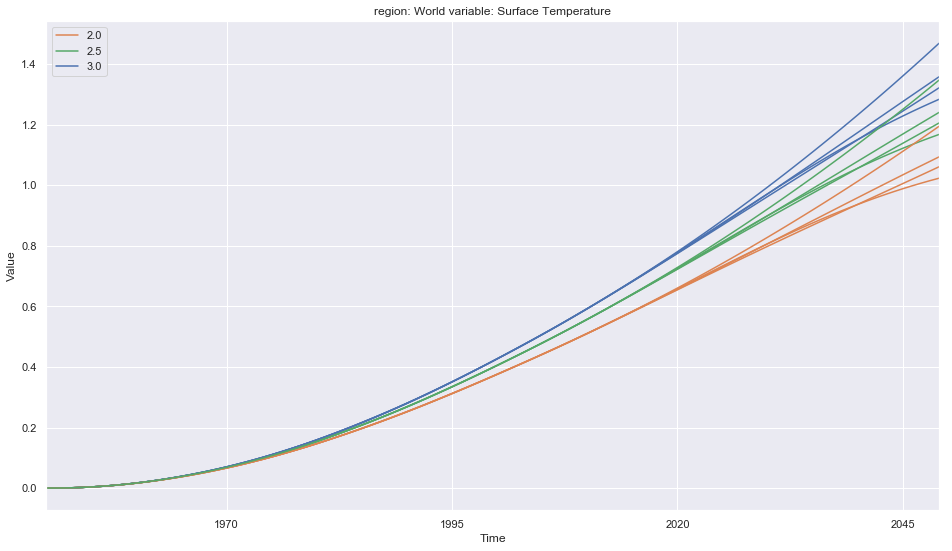

In [14]:
# IamDataFrame doesn't work with nan in metadata so runs with nan for PH99|sigma are dropped...
results.filter(
    variable="Surface Temperature"
).line_plot(
    color="ecs (delta_degC)",
    figsize=(16, 9)
);

PH99 doesn't have any carbon cycle feedbacks so the change in ECS doesn't affect atmospheric CO$_2$ concentrations.

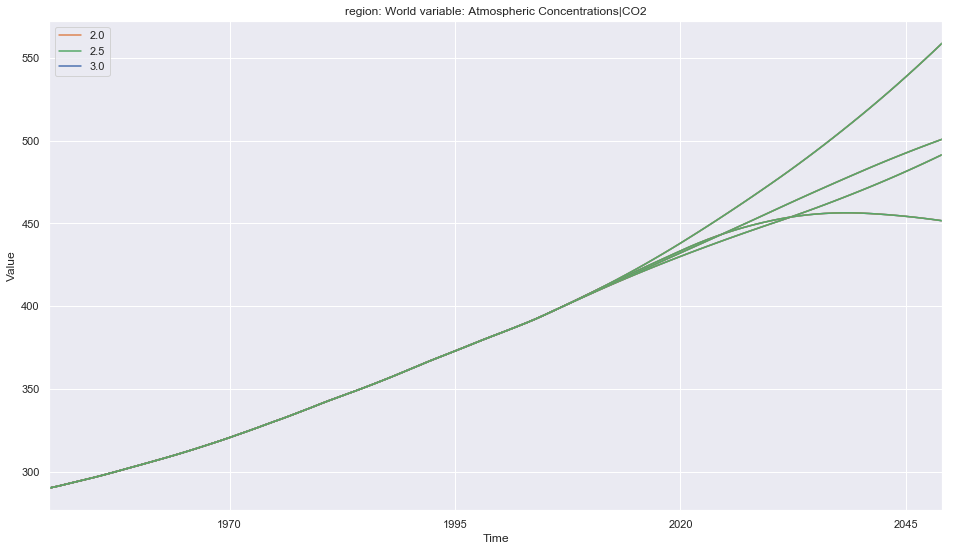

In [15]:
# IamDataFrame doesn't work with nan in metadata so runs with nan for PH99|sigma are dropped...
results.filter(
    variable="*Conc*",
    climate_model="PH99"
).line_plot(
    color="ecs (delta_degC)",
    figsize=(16, 9)
);